#Project Description:-the project is basically related to the world happiness rank card having multilple features like country,rank and multiple


#parameter to rate the label/output Happiness Score.


#this is baically come under the reggression model building due to coutiniuos label/output. 

In [1]:
#Imoporting neccecory Libraries:

#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliars
from scipy import stats

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the Dataframe
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape
#the shape of Dataframe is 158 rows and 12 columns

(158, 12)

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.info()
#here we can see that there is no null value in any of the columns and there datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isna().sum()
#As we can see there is no null present in the dataframe.

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.Region.value_counts()
#checking the value count for the Region

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

#Peroforming the encoding technique on both country and region cloumms beacuse they are having the catagorical data.

In [9]:
#performing the label encoder on country column becuse all the values in that are unique
lbend=LabelEncoder()
df1=lbend.fit_transform(df[['Country']])
df['Country']=df1

#checking the conveted columns
df.head()
#here county is conveted in to continious data.

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
#Usinng  Onehot encoder Encoder to encode the Region columns
#Note:i have already used the Binary encoder priviously but the accuracy score came is very less for that.
from sklearn.preprocessing import OneHotEncoder

In [11]:
enc = OneHotEncoder()
df1 = pd.DataFrame(enc.fit_transform(df[['Region']]).toarray())
df=df.join(df1)
df.head()
#the Region is now converted in to the binary values.

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,0,1,2,3,4,5,6,7,8,9
0,135,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,58,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,105,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
#Droping the region column as it is already encoded
df=df.drop(columns=df.columns[1])

In [13]:
df.shape
#Now we have new rows are 158 and 21 columns

(158, 21)

In [14]:
df.describe()
#discribing the data

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,0,1,2,3,4,5,6,7,8,9
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,...,0.012658,0.183544,0.037975,0.139241,0.126582,0.012658,0.056962,0.044304,0.253165,0.132911
std,45.754781,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,...,0.112150,0.388343,0.191743,0.347298,0.333562,0.112150,0.232507,0.206423,0.436207,0.340558
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,117.750000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
max,157.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#As we can check mean and median are approx same so there is very less outliers and skewness.

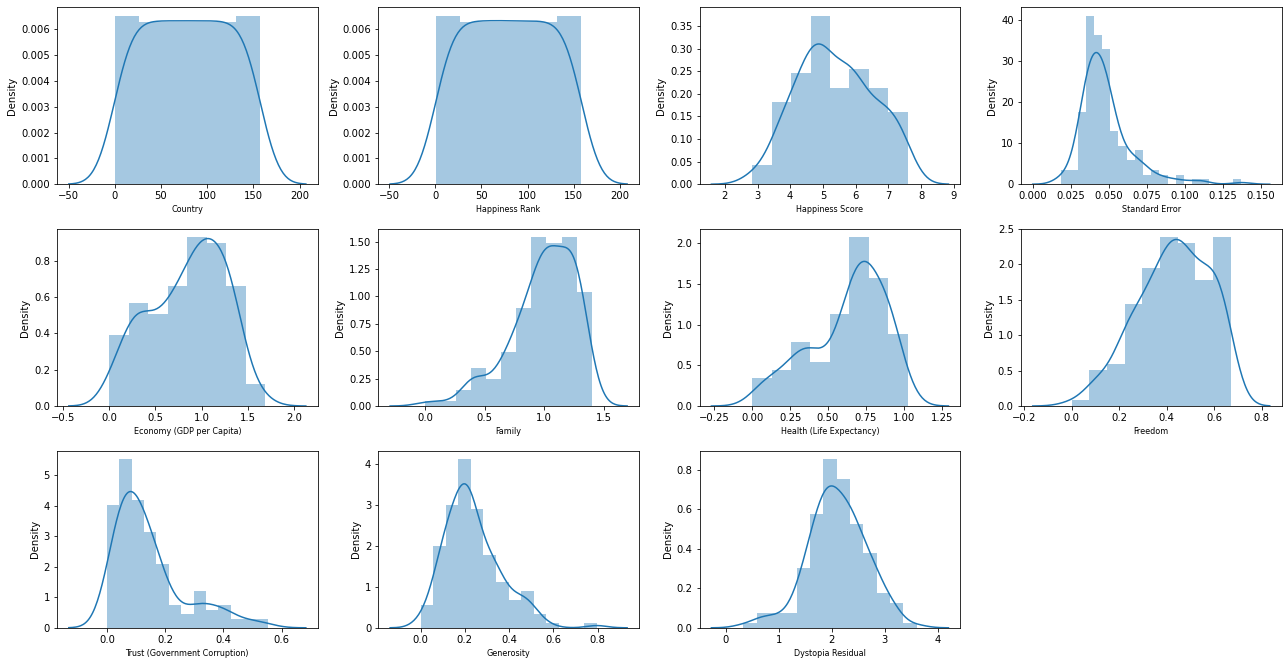

In [16]:
#Now checking the data disribution of the data using distribution plot.
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,0:11]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

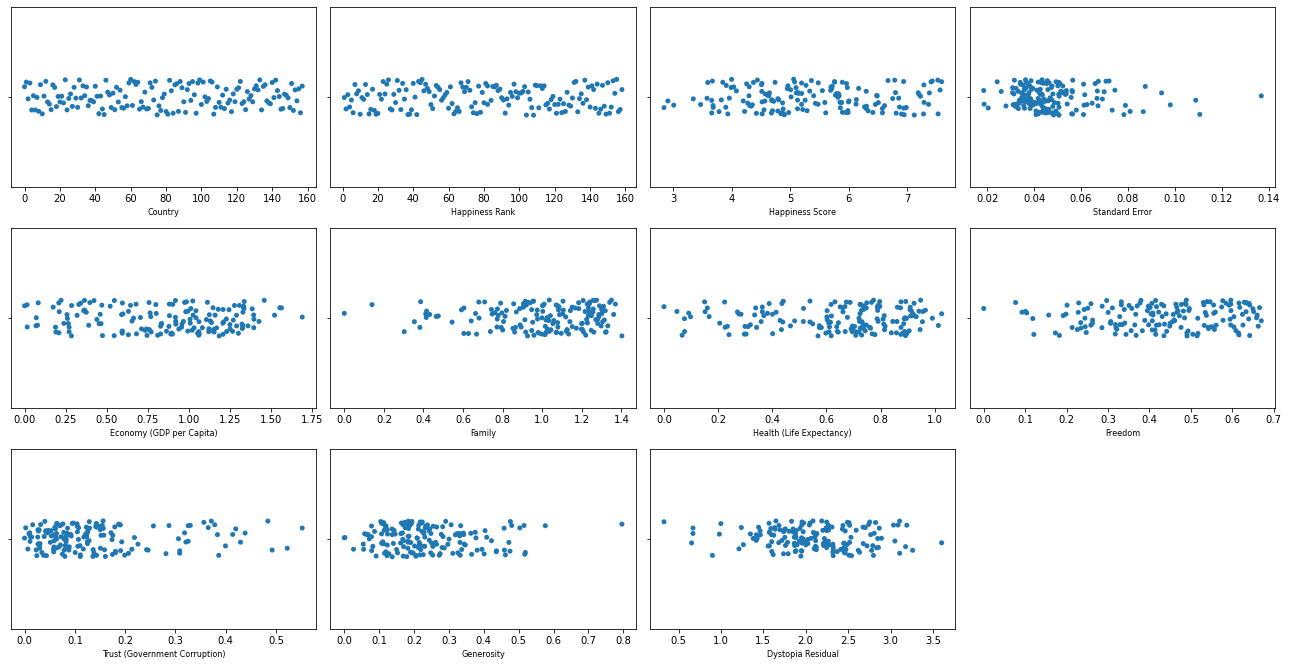

In [17]:
#as we can see the data distbution looks normal.
 
#Now cross checking the disribution of the data using striplot plot.
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,0:11]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.stripplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

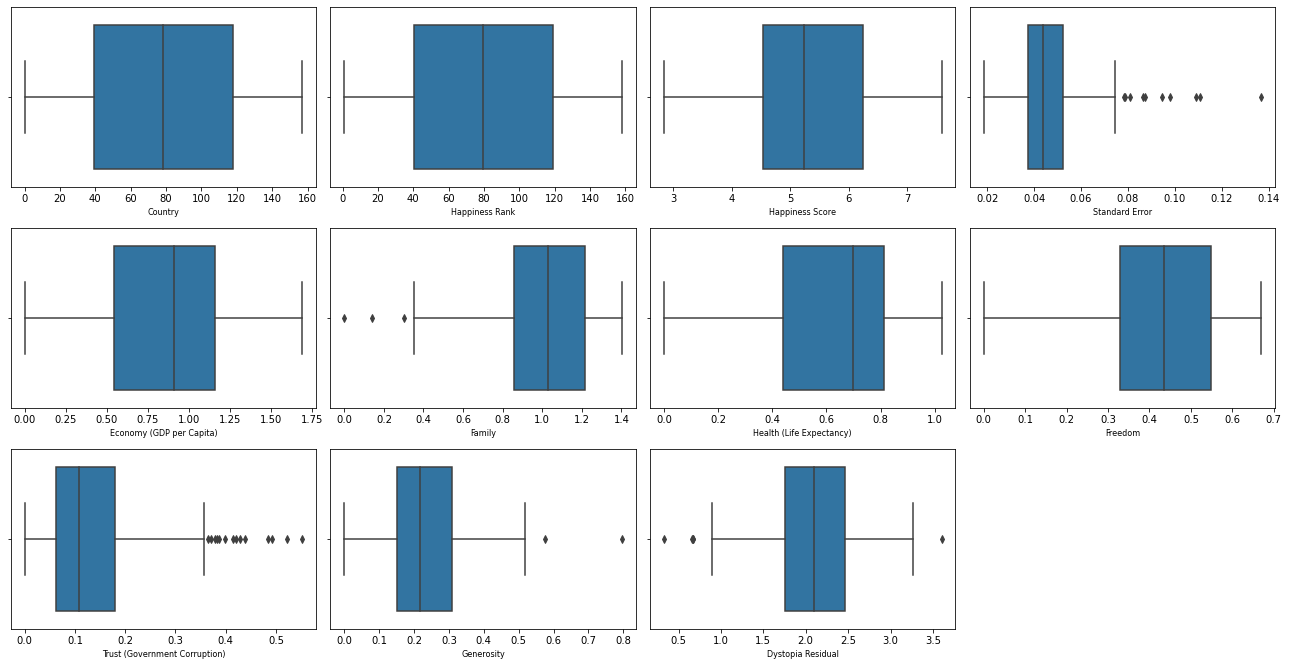

In [18]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,0:11]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.boxplot(df[columns],orient='v')
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

#here we can see that there is outliers at columns positive 3,8,9


#here we can see that there is outliers at columns negative 5

In [20]:
#Using the z-score to find the outliers indexs
#from scipy import stats
#z=np.abs(stats.zscore(df.iloc[:,[3,5,8,9]]))

#checking the indexes
#index=np.where(z > 3)[0]
#index

In [21]:
#df.shape
#now after removing the qutliers index the new shape in (149,21)

In [22]:
#NOTE: i have tried for z-score first but after the model building its accuracy is very less it is only 64%.
#So i have go for the IQR outliers deletion for deleting the outliers.

In [67]:
#finding the value of q1,q3 and iqr for the columns which has outliers
q1=df.iloc[:,[3,5,8,9]].quantile(0.25)
q3=df.iloc[:,[3,5,8,9]].quantile(0.75)

iqr=q3-q1

In [24]:
#deleting the positive outliers from the columns[3,8,9,10] in the dataset.
for column in df.iloc[:,[3,8,9,10]]:
    index=np.where(df[column] > (q3[column] + (1.5 * iqr[column])))
    df=df.drop(df.index[index])
    df.reset_index()

In [25]:
#checking the shape after deleting positive outliers
df.shape

(131, 21)

In [26]:
#deleting the neg outliers from the columns[5,10] in the dataset.
for column in df.iloc[:,[5,10]]: 
    index=np.where(df[column] < (q3[column] - (1.5 * iqr[column])))
    df=df.drop(df.index[index])
    df.reset_index()

In [27]:
#checking the shape after deleting negative outliers
df.shape

(106, 21)

In [28]:
#Now checking the skewness form the data
#To check the correlation between features we can plot heat map.
corr_matrix=df.iloc[:,0:11].abs().corr()
corr_matrix["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.768351
Family                           0.748976
Health (Life Expectancy)         0.747886
Dystopia Residual                0.578572
Freedom                          0.561240
Trust (Government Corruption)    0.379579
Generosity                       0.281035
Country                         -0.042506
Standard Error                  -0.207859
Happiness Rank                  -0.992838
Name: Happiness Score, dtype: float64

#As the Many of columms having value greater than +0.5 and -0.5 so there is the skewness is available in data.

In [30]:
#we are using sqrt transformantion to remove the skewness from the columns

df['Economy (GDP per Capita)']=np.sqrt(df['Economy (GDP per Capita)'])
df['Health (Life Expectancy)']=np.sqrt(df['Health (Life Expectancy)'])
df['Family']=np.sqrt(df['Family'])
df['Freedom']=np.sqrt(df['Freedom'])
df['Dystopia Residual']=np.sqrt(df['Dystopia Residual'])
df['Happiness Rank']=np.sqrt(df['Happiness Rank'])

In [31]:
#Now checking the skewness form the data
#To check the correlation between features we can plot heat map.
corr_matrix=df.iloc[:,0:11].abs().corr()
corr_matrix["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Family                           0.744208
Economy (GDP per Capita)         0.731054
Health (Life Expectancy)         0.693629
Dystopia Residual                0.582972
Freedom                          0.514936
Trust (Government Corruption)    0.379579
Generosity                       0.281035
Country                         -0.042506
Standard Error                  -0.207859
Happiness Rank                  -0.993606
Name: Happiness Score, dtype: float64

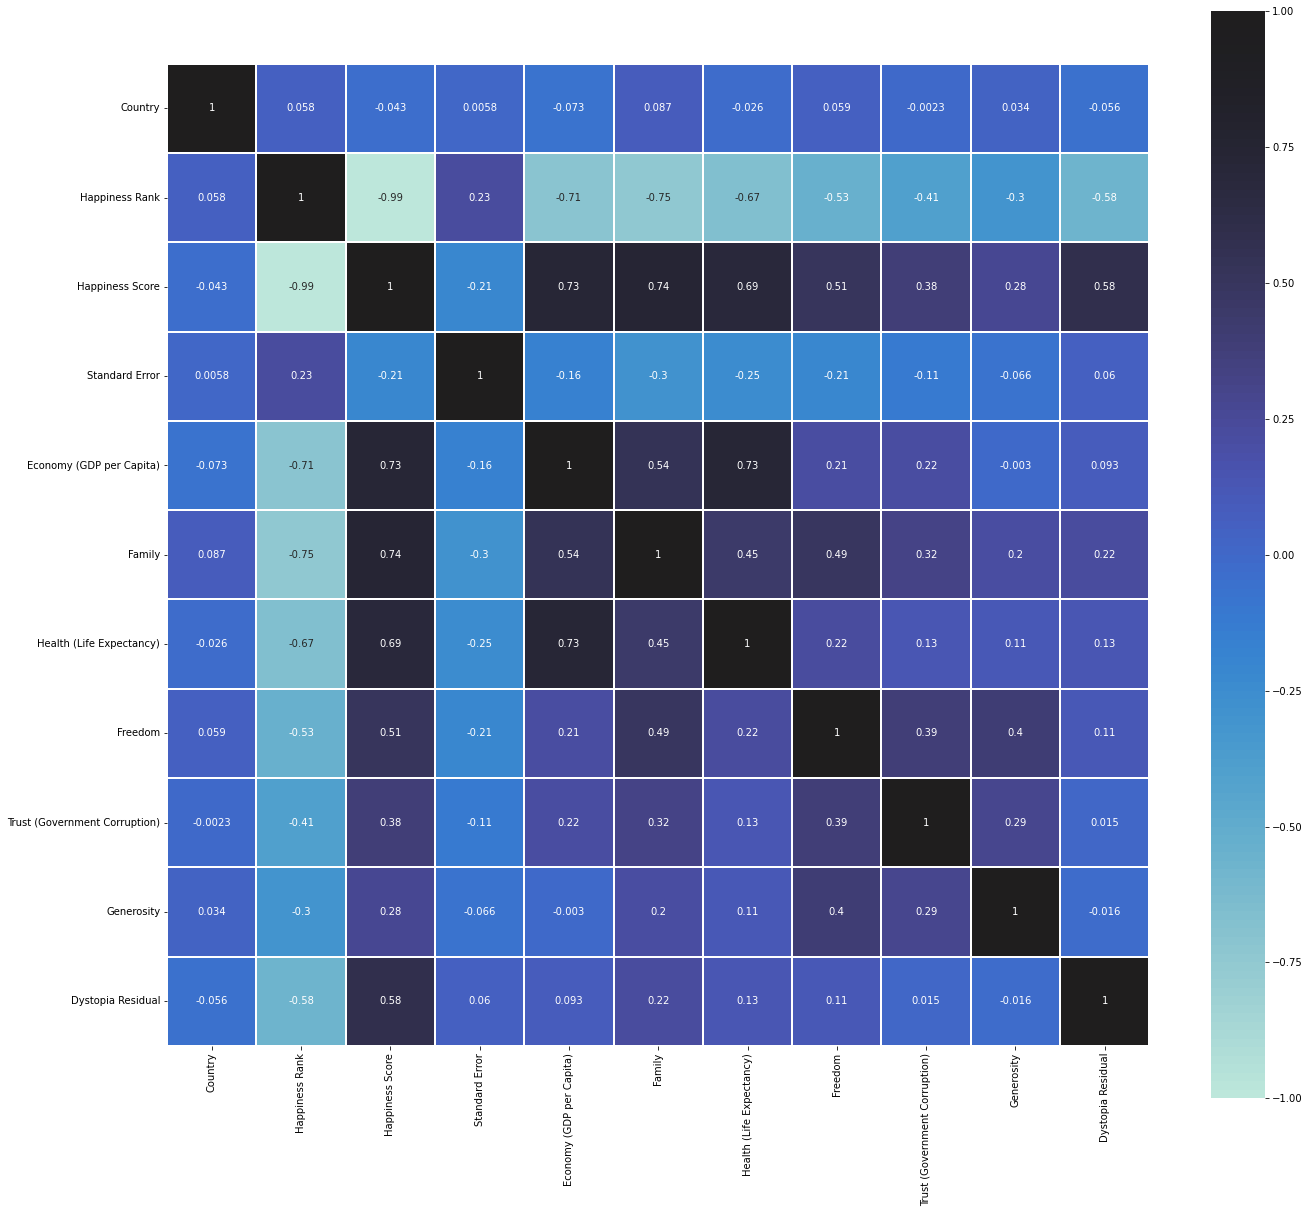

In [65]:
#Checking multicilliniary using heatmap

corr_df=df.iloc[:,0:11].abs().corr()

plt.figure(figsize=(22,20))

sns.heatmap(corr_df,vmin=-1,vmax=1,center=True,square=True,annot=True,fmt='.2g',linewidths=0.2)
plt.show()

#As we can see that there is nomulticolliniarity.

In [34]:
#Splitting the columns for the Standred Scalar
x=df.drop(columns='Happiness Score',axis=1)
y=df['Happiness Score']

In [35]:
#Seprating the clumns which we have to perform the statnderd scalar becuase all other colomns are alredy encoded so no need
#to perfrom the standred scalar on that
col_names = ['Country','Happiness Rank', 'Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
features = x[col_names]
scalar = StandardScaler()
x = scalar.fit_transform(features.values)

In [36]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state = i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("Best Accuracy is:",maxAcc*100,"on random_state:",maxRs)        

Best Accuracy is: 99.8208044656354 on random_state: 132


In [37]:
#Applying the train test split method to seprate the train and test daat
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state = 132)

In [38]:
#applying the LR model and fitting the x_train and y_train.
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
#pridiecting the y test outcome and storing it to y_pred
y_pred=lr.predict(x_test)

In [40]:
#model Evaluation for LR using r2_score method:
accuracy=r2_score(y_test,y_pred)

print("The accuracy of the model on test Data(LR) is: ",accuracy*100)

The accuracy of the model on test Data(LR) is:  99.8208044656354


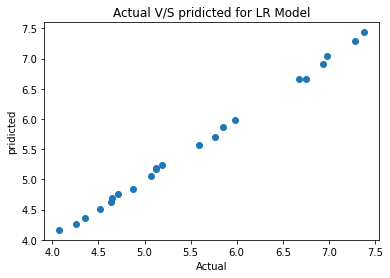

In [41]:
#compare by plotting scatter plot the actual y_test result with the y_prdicted result
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('pridicted')
plt.title('Actual V/S pridicted for LR Model')
plt.show()

In [42]:
#Using KNN reggression method to evalute to accuracy:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

#y predict:
y_pred_knn=knn.predict(x_test)

#model Evaluation for KNN:
accuracy_knn=r2_score(y_test,y_pred_knn)

print("The accuracy of the model on test Data(KNN) is: ",accuracy_knn*100)

The accuracy of the model on test Data(KNN) is:  94.30200392614479


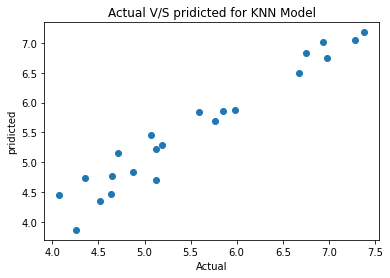

In [43]:
#compare by plotting scatter plot the actual y_test result with the y_prdicted result
plt.scatter(y_test,y_pred_knn)
plt.xlabel('Actual')
plt.ylabel('pridicted')
plt.title('Actual V/S pridicted for KNN Model')
plt.show()

In [44]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

#y predict:
y_pred_rfr=rfr.predict(x_test)

#model Evaluation for RFR:
accuracy_rfr=r2_score(y_test,y_pred_rfr)

print("The accuracy of the model on test Data(RFR) is: ",accuracy_rfr*100)

The accuracy of the model on test Data(RFR) is:  99.62387760041008


In [45]:
#Using AdaBoost reggression method to evalute to accuracy:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)

#y predict:
y_pred_abr=abr.predict(x_test)

#model Evaluation for KNN:
accuracy_abr=r2_score(y_test,y_pred_abr)

print("The accuracy of the model on test Data(ABR) is: ",accuracy_abr*100)

The accuracy of the model on test Data(ABR) is:  98.97035122429729


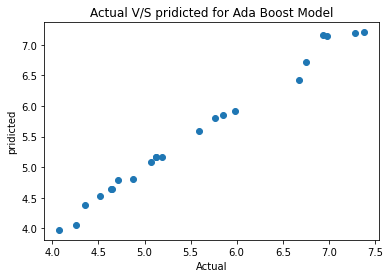

In [46]:
#compare by plotting scatter plot the actual y_test result with the y_prdicted result
plt.scatter(y_test,y_pred_abr)
plt.xlabel('Actual')
plt.ylabel('pridicted')
plt.title('Actual V/S pridicted for Ada Boost Model')
plt.show()

#Checking the Overfitting and underfitting of all the models Using cross_val_score:

In [48]:
#importing the cross validation library
from sklearn.model_selection import cross_val_score

In [49]:
#checking cross_val_score for the LR Model:
cvs=cross_val_score(lr,x,y,cv=5)
print("Cross validation for the Linear Reggression is: ",cvs.mean()*100)

Cross validation for the Linear Reggression is:  85.08332576487376


In [50]:
#checking cross_val_score for the KNN Model:
cvs=cross_val_score(knn,x,y,cv=5)
print("Cross validation for the KNN Reggression is: ",cvs.mean()*100)

Cross validation for the KNN Reggression is:  -383.2679815761304


In [51]:
#checking cross_val_score for the Random forest Model:
cvs=cross_val_score(rfr,x,y,cv=5)
print("Cross validation for the Random Forest Reggression is: ",cvs.mean()*100)

Cross validation for the Random Forest Reggression is:  -146.53644696017508


In [52]:
#checking cross_val_score for the Ada Boost Reggression Model:
cvs=cross_val_score(abr,x,y,cv=5)
print("Cross validation for the Ada Boost Reggression is: ",cvs.mean()*100)

Cross validation for the Ada Boost Reggression is:  -197.88309628773945


In [ ]:
#as we can see the cross_val_score for all the models:
#for the Linear Reggression is:  85.08
#for the KNN Reggression is:  -383.26
#for the Random Forest Reggression is:  -143.68
#for the Ada Boost Reggression is:  -215.41


#All are showing negative only LR has positive accuracy=85.08
#So we are selecting LR for hyper parameter tuning

In [54]:
param_value={'fit_intercept':['False','True'],
    'normalize':['False','True'],
    'copy_X':['True','False']}

In [55]:
gridsearch=GridSearchCV(lr,param_value)

In [56]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['False', 'True'],
                         'normalize': ['False', 'True']})

In [57]:
gridsearch.best_params_

{'copy_X': 'True', 'fit_intercept': 'False', 'normalize': 'False'}

In [58]:
#Applying the gridsearch best on LR 
lr=LinearRegression(copy_X=True, fit_intercept=False,normalize=False)
lr.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [59]:
#y predict:
y_pred_lr1=lr.predict(x_test)

#model Evaluation for RFR:
accuracy_lr1=r2_score(y_test,y_pred_lr1)

print("The accuracy of the model on test Data(LR) is after GridsearchCV: ",accuracy_lr1*100)

The accuracy of the model on test Data(LR) is after GridsearchCV:  -3936.057044718282


In [60]:
#checking cross_val_score for the LR Model:
cvs=cross_val_score(lr,x,y,cv=5)
print("Cross validation for the Linear Reggression is: ",cvs.mean()*100)

Cross validation for the Linear Reggression is:  -193743.59128224236


#After Aplying the gridsearch CV the model accracy is decressed.So we will got go for Hyper parameter tuning.

In [62]:
#applying the LR model and fitting the x_train and y_train.
lr=LinearRegression()
lr.fit(x_train,y_train)

#pridiecting the y test outcome and storing it to y_pred
y_pred=lr.predict(x_test)

#model Evaluation for LR using r2_score method:
accuracy=r2_score(y_test,y_pred)

print("The accuracy of the model on test Data(LR) is: ",accuracy*100)

The accuracy of the model on test Data(LR) is:  99.8208044656354


In [63]:
#Saving the Model into pkl file
import joblib
joblib.dump(lr,'World_Happiness_Model.pkl')

['World_Happiness_Model.pkl']

#This Compelete the our model building for World Happiness Dataset.